In [5]:
import numpy as np
import pandas as pd
import warnings 

In [6]:
warnings.filterwarnings("ignore")

**Get the dataset**

In [7]:
col_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("./ml-100k/u.data", sep="\t", names=col_names)


In [8]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
df.shape

(100000, 4)

In [10]:
df["user_id"].nunique()

943

In [11]:
df["item_id"].nunique()

1682

In [12]:
movie_df = pd.read_csv("./ml-100k/u.item", sep="|", header = None,encoding='ISO-8859-1')

In [13]:
movie_df = movie_df.get([0,1])

In [14]:
movie_df.columns = ["item_id", "title"]

In [15]:
movie_df.head(n=3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [16]:
df = pd.merge(df,movie_df,on="item_id")

In [17]:
df.head(n=3)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)


**Exploratory data analysis**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [19]:
df2 = df.groupby("title").mean()

In [20]:
rating_avg = df2[["rating"]]

In [21]:
rating_count = pd.DataFrame(df.groupby("title").count()["rating"])

In [22]:
rating_avg

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [23]:
rating_count

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


In [24]:
rating = pd.merge(rating_avg,rating_count,on="title",suffixes=("_avg", "_count"))

In [25]:
rating

,rating_avg,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [26]:
rating.sort_values(by="rating_avg", ascending=False)

,rating_avg,rating_count
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


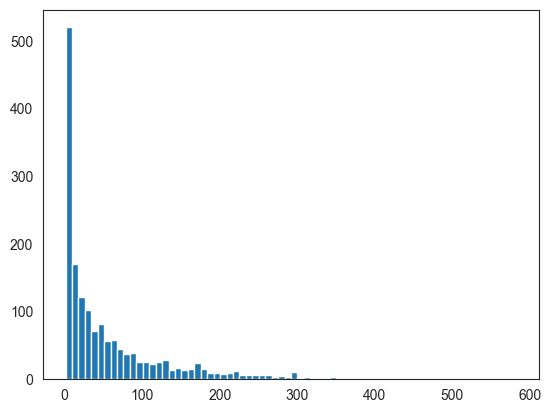

In [27]:

plt.hist(rating["rating_count"],bins=70)
plt.show()

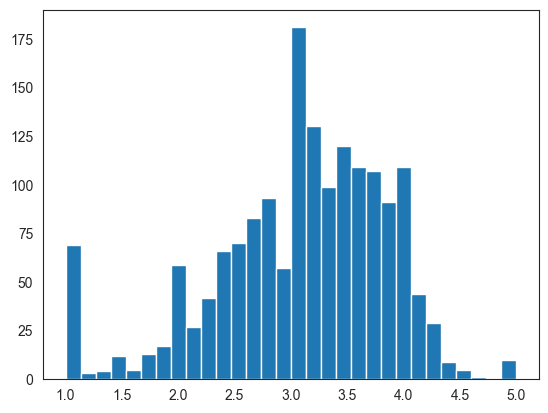

In [28]:
plt.hist(rating["rating_avg"],bins=30)
plt.show()

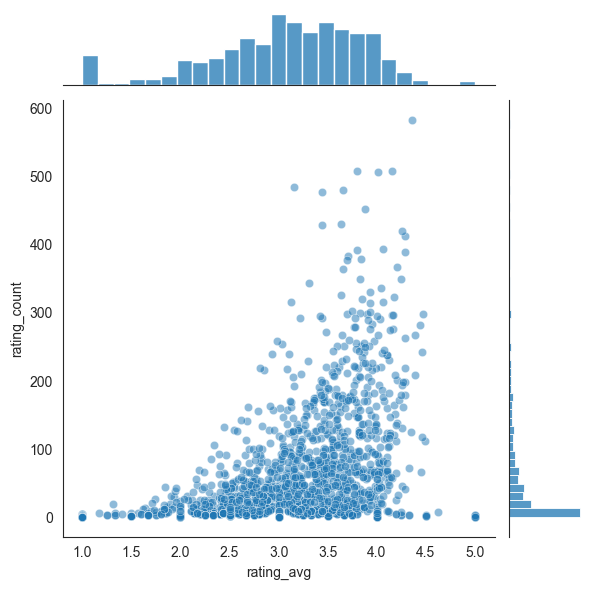

In [29]:
sns.jointplot(x='rating_avg',y="rating_count",data=rating, alpha=0.5)

**Movie Recomendation**

In [30]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [31]:
movie_mat = df.pivot_table(index="user_id", columns="title", values="rating")

In [32]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [33]:
starwars_user_rating = movie_mat["Star Wars (1977)"]

In [34]:
starwars_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [35]:
similar_to_starwars = movie_mat.corrwith(starwars_user_rating)

In [36]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=["corr"])

In [37]:
corr_starwars.dropna(inplace=True)

In [38]:
corr_starwars.sort_values(["corr"], ascending=False)

,corr
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [39]:
corr_starwars = corr_starwars.join(rating["rating_count"])

In [42]:
corr_starwars

,corr,rating_count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [46]:
corr_starwars[corr_starwars["rating_count"]>100].sort_values('corr', ascending=False)

,corr,rating_count
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


**Predict movies**

In [47]:
def predict_movies(movie_name):
    movie_user_rating = movie_mat[movie_name]
    similar_to_movie = movie_mat.corrwith(movie_user_rating)
    corr_movie = pd.DataFrame(similar_to_movie,columns=["corr"])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(rating["rating_count"])
    predictions = corr_movie[corr_movie["rating_count"]>100].sort_values('corr', ascending=False)

    return predictions

In [48]:
predict_movies("Titanic (1997)")

,corr,rating_count
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
...,...,...
Raging Bull (1980),-0.223660,116
Jackie Brown (1997),-0.236841,126
Brazil (1985),-0.243532,208
